# Introduction/Overview:

# Data Preparation

## Importing Relevant Modules and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
#Rotten Tomatoes datasets
rot_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

#iMDB datasets
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#Box Office Mojo
bojo_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

#the Movied DB
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

#Movie bydget DB
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

## Creating Joined Data Table (iMDB + TN Budget)

In [4]:
#setting indexes to 'tconst' for each dataset to prep for inner join
imdb_titles.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [5]:
#joining dfs using inner join to get iMDB movies that contain both titles and ratings
imdb_titles_ratings = imdb_titles.join(imdb_ratings, how='inner')

imdb_titles_ratings.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [6]:
#Function to tranform money columns into cleaned integers dtyes
def money_cleaner(df, column_name, new_col_name):
    df[new_col_name] = df[column_name].map(lambda x: x.replace('$', ''))
    df[new_col_name] = df[new_col_name].map(lambda x: x.replace(',', ''))
    df[new_col_name] = pd.to_numeric(df[new_col_name])
    
    return df[new_col_name]

#Cleaning budget column
budget_clean = money_cleaner(budget, 'production_budget', 'budget_clean')
budget['budget_clean'] = budget_clean

#Cleaning world_wide_Gross column
worldwide_gross = money_cleaner(budget, 'worldwide_gross', 'ww_gross_clean')
budget['ww_gross_clean'] = worldwide_gross

budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   budget_clean       5782 non-null   int64 
 7   ww_gross_clean     5782 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 361.5+ KB


In [7]:
#Creates a production_profit column to determine how much profit each movie made
#after budget accounted for
budget['production_profit'] = budget['ww_gross_clean'] - budget['budget_clean']
budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,635063875


In [8]:
imdb_titles_ratings.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [9]:
#Merges the iMDB databases w/ financial info for more complete dataset

movies_df = pd.merge(imdb_titles_ratings, budget, right_on='movie', left_on='original_title')
movies_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294
1,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996


## Cleaning Data Table

In [10]:
#5 items w/o genres; 106 items w/o runtime; 2638 items total
movies_df.info()

#since there are only 5 items w/o genre, items are dropped. Brings total to 2633
movies_df.dropna(subset=['genres'], inplace=True)

#runtime will not be used in final analysis, so no cleaning will be performed 
#on items 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 0 to 2637
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2638 non-null   object 
 1   original_title     2638 non-null   object 
 2   start_year         2638 non-null   int64  
 3   runtime_minutes    2532 non-null   float64
 4   genres             2633 non-null   object 
 5   averagerating      2638 non-null   float64
 6   numvotes           2638 non-null   int64  
 7   id                 2638 non-null   int64  
 8   release_date       2638 non-null   object 
 9   movie              2638 non-null   object 
 10  production_budget  2638 non-null   object 
 11  domestic_gross     2638 non-null   object 
 12  worldwide_gross    2638 non-null   object 
 13  budget_clean       2638 non-null   int64  
 14  ww_gross_clean     2638 non-null   int64  
 15  production_profit  2638 non-null   int64  
dtypes: float64(2), int64(6),

In [11]:
# There are 541 titles that are duplicates in the data frame, 2633 total
movies_df.duplicated(subset='primary_title').sum()

#Creates new series with booleans to see if entry is duplicate
movies_df['duplicates'] = movies_df.duplicated(subset='primary_title')


In [12]:
#drops duplicat entries while keeping first entry (2633-541 = 2092)
movies_df.drop_duplicates(keep='first', subset='primary_title', inplace=True)

#Sucessfully dropped duplicate entries
movies_df.shape

(2092, 17)

In [33]:
#the start_year column is misleading. It does not always represent the actual 
#release date (e.g., Action Jackson came out in 1988, but start date is 2014)

#One solution is to convert the release date to datetime in a new column
movies_df['date_released'] = pd.to_datetime(movies_df['release_date'])

#Another solution create a column with only the year and overwrite start_year
movies_df['start_year'] = movies_df['release_date'].map(lambda x: x[-4:])

#The last step is to convert the column into an int64 dtype
movies_df['start_year'] = pd.to_numeric(movies_df['start_year'])


## Creating Top 100 Data Table

In [36]:
#organizing df for top 100 worldwide grossing films
top_100_df = movies_df.sort_values(by='ww_gross_clean', ascending=False)[:100].copy()

#cleaning up the df to only include necessary columns
top_100_df.drop(['original_title', 'runtime_minutes', 'id', 'movie', 'production_budget', 'worldwide_gross', 'duplicates', 'release_date'], axis=1, inplace=True)

top_100_df.shape

(100, 10)

## Creating Top 2021 Movies Table Using Webscraping

In [55]:
#Using webscraping to pull the info of the top films of 2021 using 
#Box Office MoJo

from bs4 import BeautifulSoup
import requests
html_page = requests.get("https://www.boxofficemojo.com/year/2021/?ref_=bo_lnav_hm_shrt")

soup = BeautifulSoup(html_page.content, 'html.parser')


In [56]:
#finding relevant division and creating container
table = soup.find('div', id='table')

#seperates all the relevant rows with movie data from table headers
table_rows = table.findAll('tr')[1:]

#length outputs 200 items, which corresponds to the 200 items on the website
len(table_rows)

200

In [352]:
#Now to extract information from the first row to serve as a template for
#other rows 
table_rows[0]

<tr><td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td><td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl3490022913/?ref_=bo_yld_table_1">Shang-Chi and the Legend of the Ten Rings</a></td><td class="a-text-left mojo-field-type-genre hidden">-</td><td class="a-text-right mojo-field-type-money hidden">-</td><td class="a-text-right mojo-field-type-duration hidden">-</td><td class="a-text-right mojo-field-type-money mojo-estimatable">$223,152,296</td><td class="a-text-right mojo-field-type-positive_integer">4,300</td><td class="a-text-right mojo-field-type-money mojo-estimatable">$223,152,296</td><td class="a-text-left mojo-field-type-date a-nowrap">Sep 3</td><td class="a-text-left mojo-field-type-studio"><a class="a-link-normal" href="https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&amp;ref_=mojo_yld_table_1&amp;rf=mojo_yld_table_1" rel="noopener" target="_blank">Walt D

In [57]:
#finding rank
rank = table_rows[0].find('td', class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column").text
rank

'1'

In [58]:
#finding title
title = table_rows[0].find('td', class_= "a-text-left mojo-field-type-release mojo-cell-wide").text
title

'Shang-Chi and the Legend of the Ten Rings'

In [59]:
#finding amount grossed
gross = table_rows[0].find('td', class_ = "a-text-right mojo-field-type-money mojo-estimatable").text
gross

'$223,152,296'

In [60]:
#finding release data
release_date = table_rows[0].find('td', class_ = "a-text-left mojo-field-type-date a-nowrap").text
release_date

'Sep 3'

In [61]:
#finding studio
studio =  table_rows[0].find('td',class_ = "a-text-left mojo-field-type-studio").text.strip()
studio

'Walt Disney Studios Motion Pictures'

In [62]:
def get_movie_data(movie_table):
    movie_data = []
    for row in movie_table:
        rank = row.find('td', class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column").text
        title = row.find('td', class_= "a-text-left mojo-field-type-release mojo-cell-wide").text
        gross = row.find('td', class_ = "a-text-right mojo-field-type-money mojo-estimatable").text
        release_date = row.find('td', class_ = "a-text-left mojo-field-type-date a-nowrap").text
        studio = row.find('td',class_ = "a-text-left mojo-field-type-studio").text.strip()
        
        movie_data.append({'Rank': rank, 'Title': title, 'Gross': gross, 
                           'Release Date': release_date, 'Studio': studio})
    return movie_data

In [63]:
movie_data = get_movie_data(table_rows)

In [66]:
rankings_2021_df = pd.DataFrame(movie_data)


In [68]:
#applying money_cleaner function to gross column
gross_clean = money_cleaner(rankings_2021_df, 'Gross', 'Gross_Clean')

#adds column to existing df
rankings_2021_df['Gross_Clean'] = gross_clean
rankings_2021_df.head()

,Rank,Title,Gross,Release Date,Studio,Gross_Clean
0,1,Shang-Chi and the Legend of the Ten Rings,"$223,152,296",Sep 3,Walt Disney Studios Motion Pictures,223152296
1,2,Venom: Let There Be Carnage,"$192,114,061",Oct 1,Sony Pictures Entertainment (SPE),192114061
2,3,Black Widow,"$183,651,655",Jul 9,Walt Disney Studios Motion Pictures,183651655
3,4,F9: The Fast Saga,"$173,005,945",Jun 25,Universal Pictures,173005945
4,5,A Quiet Place Part II,"$160,072,261",May 28,Paramount Pictures,160072261


# Preliminary Analysis: Getting Descriptive Statistics

## What percent of movies have made between 2010 and 2019? 

In [46]:

#filtering based on start year, currently 2092 entries
filt = (movies_df['start_year']>=2015)

movies_df.loc[filt]

#1795 entries after the filter for after 2010 = 86% of movies in df
#778 for entries for after 2015 = 37% of movies in df



0.37189292543021035

## Of the top 100 grossing films, how many came out since 2015?

In [54]:
#creating filter 
filt = (top_100_df['start_year'] >= 2010)

top_100_df.loc[filt].shape

#48 of the top 100 came out between 2015 and 2019
#98 of the top 100 came out in the last 10 years
#only one entry before 2000 and one entry from 2005. 


(98, 10)

## Which studios have performed the best this year? How much have the grossed?

In [71]:
#sorts by the studio name and then sums the values of total gross per studio
studio_gross = rankings_2021_df.groupby('Studio').sum('Gross_Clean').sort_values(by='Gross_Clean', ascending=False)

studio_gross.head()

#Based of this:
## Disney has made: $665,007,950
## Universal has made: $568,362,680
## Warner Bro's has made: $549,557,233
## Sony Pictures has made: $262,300,507
## Paramount Pictures has made: $229,508,894

,Gross_Clean
Studio,
Walt Disney Studios Motion Pictures,665007950
Universal Pictures,568362680
Warner Bros.,549557233
Sony Pictures Entertainment (SPE),262300507
Paramount Pictures,229508894


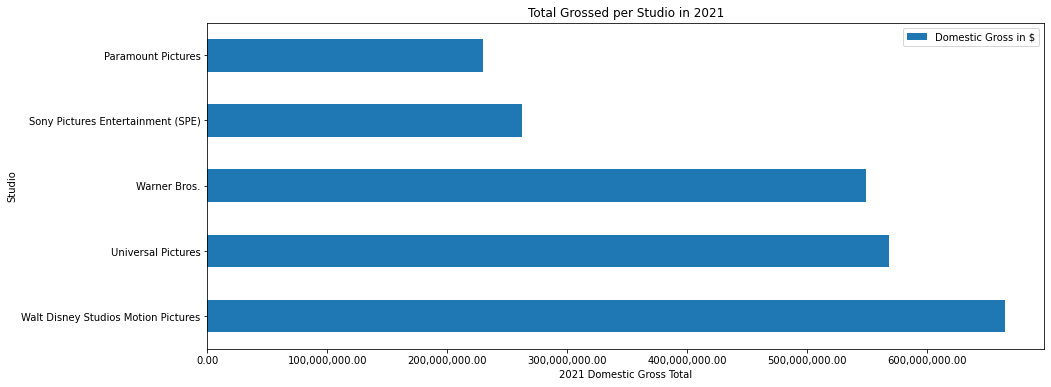

In [79]:
#Creates horizontal bargraph visualiation
ax = studio_gross[:5].plot(kind='barh', figsize=(15, 6))
#sns.barplot(data=studio_gross, x=studio_gross.index[:5], y=studio_gross['Gross_Clean'][:5])

ax.set_xlabel('2021 Domestic Gross Total')
ax.xaxis.set_major_formatter("{x:,.2f}")
ax.legend(['Domestic Gross in $'], loc='upper right')
ax.set_title('Total Grossed per Studio in 2021');

# Question #1: Which Movie Genres are Most Successful/Profitable?

## Creating Genre Data Frame

In [131]:
#Currently movie genres are clumped together and need to be seperated into 
#distinct rows

#Splits/seperates each genre category for each movie/row
movies_df['genres_list'] = movies_df['genres'].map(lambda x: x.split(','))
movies_df.head(2)

#Creates new df with each genre category represented in a row
genres_df = movies_df.explode('genres_list')
genres_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,genres_list,duplicates
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,Action,False
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,Animation,False


## Visual #1: Profit of Various Movie Genres

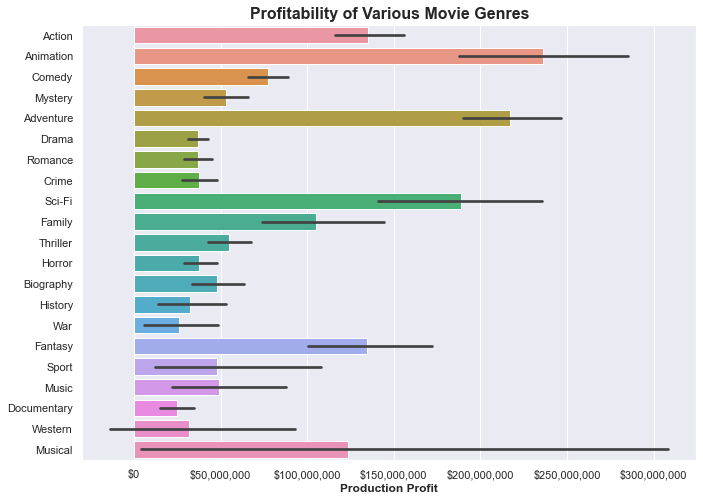

In [372]:
#plotting horizontal bar graph

ax = sns.barplot(data=genres_df, y='genres_list', x='production_profit')


ax.get_figure().set_size_inches((11, 8))

##?? HOW to order by profit rather than genre category?? 
ax.set_xlabel('Production Profit', fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter("${x:,.0f}")

##?? HOW to rotate xlabels?

ax.set_ylabel(ylabel=None)

ax.set_title('Profitability of Various Movie Genres', fontsize=16, fontweight='bold');
##link_to_data_vis = https://github.com/flatiron-school/ds-flex-fundamentals-of-data-visualization-2021

# Question #2:  What is the average movie profit since 2010?

## Visual: Average Movie Profit Broken Down by Year

In [150]:
movies_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,genres_list,duplicates
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,"[Action, Animation, Comedy]",False
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996,"[Comedy, Mystery]",False


In [83]:
#Data frame contains years 2010-2019
movies_df['start_year'].value_counts()
filt=movies_df['start_year']>=2010

movies_2010_up = movies_df.loc[filt]

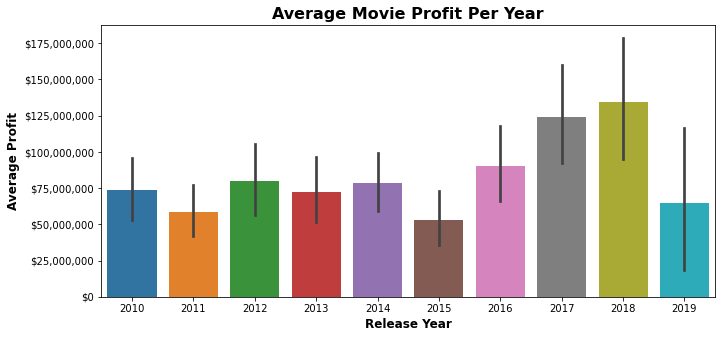

In [84]:
#Creating barplot to see distribution of movie profit per year

fig, ax = plt.subplots(figsize=(11,5))

ax = sns.barplot(data=movies_2010_up, x='start_year', y='production_profit')


ax.set_xlabel('Release Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Profit', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter("${x:,.0f}")


ax.set_title('Average Movie Profit Per Year', fontsize=16, fontweight='bold');

## Visual: Average Profit and Budget Per Movie

''

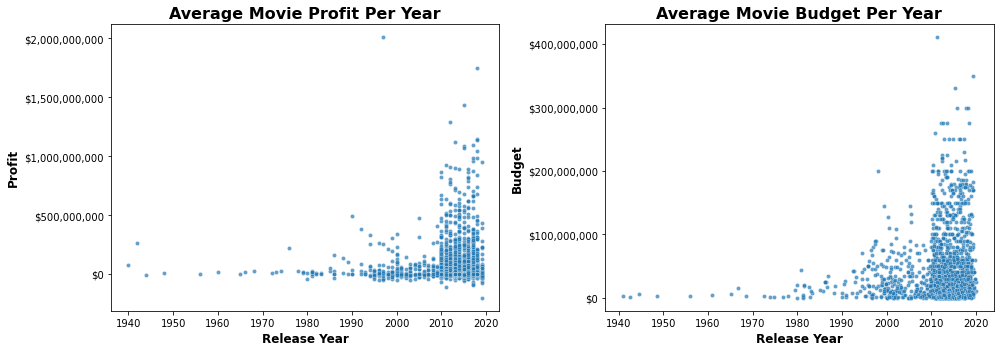

In [95]:
fig, axes = plt.subplots(figsize=(14,5), ncols=2)


#Average movie profit scatterplot
sns.scatterplot(data=movies_df, x='start_year', y='production_profit', 
                     ax=axes[0], alpha=0.7, s=17)

axes[0].set_xlabel('Release Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Profit', fontsize=12, fontweight='bold')
axes[0].yaxis.set_major_formatter("${x:,.0f}")
axes[0].set_title('Average Movie Profit Per Year', fontsize=16, fontweight='bold')

#Average movie budget per year
sns.scatterplot(data=movies_df, x='date_released', y='budget_clean', 
                     alpha=0.7, s=17, ax=axes[1])

axes[1].set_xlabel('Release Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Budget', fontsize=12, fontweight='bold')
axes[1].yaxis.set_major_formatter("${x:,.0f}")
axes[1].set_title('Average Movie Budget Per Year', fontsize=16, fontweight='bold');

fig.tight_layout();
;

## HOW to set ylim and zoom in? Can I create a replot here? Do I need to change 
## date values to integers?

# Question #3: What is the average budget per film since 2010?

# Question #4: How do ratings affect profitability? 

In [96]:
movies_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,False,2012-12-31
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996,False,2015-06-19


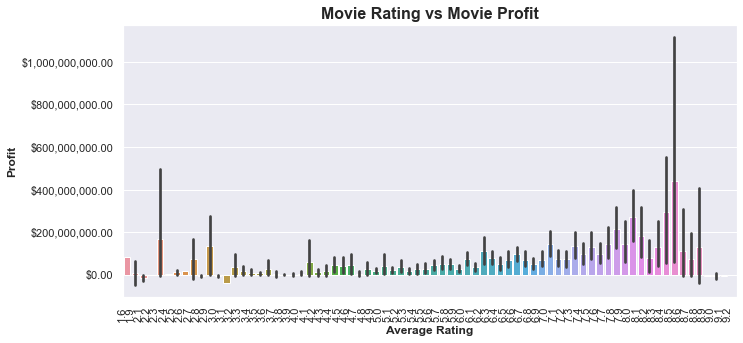

In [262]:
fig, ax = plt.subplots(figsize=(11,5))
plt.xticks()
ax = sns.barplot(data=movies_df, y='production_profit', x='averagerating')
#alpha=0.7, s=27)

ax.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')

ax.set_ylabel('Profit', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter("${x:,.2f}")
ax.set_title("Movie Rating vs Movie Profit", fontsize=16, fontweight='bold');

#HOW to set x-tick labels and number of bins?

# Question #4: What are some common traits/characteristics of the top 100 grossing films?

## Creating Top 100 Data Frame with Observed Characteristics

In [333]:
#Adding observations into columns: 1.) Is it a part of series/is it a sequel?, 
# 2.) Is it a superhero movie?, 3.) Is it animated?


In [318]:
#manually went through the movies and determined if they were a part of a series 
#or sequl
series_or_sequel= [False, True, True, True, True, True,True, True, False, True,
                  True, True, False, True, True, True, True, True, True, True,
                  True, True, False, True, False, True, True, False, False, True,
                  True, False, False, True, True, True, True, True, False, True,
                  True, False, True, False, True, False, True, True, True, True,
                  False, True, True, True, True, True, True, True, False, True,
                  True, False, False, True, True, False, False, True, True, False,
                  True, True, False, True, True, False, False, True, True, True,
                  False, False, True, True, False, True, True, True, False, False,
                  True, False, False, True, False, True, False, False, True, True]
#created new column to store values
top_100_df['series_or_sequel'] = series_or_sequel


In [329]:
#manually determing whether it was a hero-related movie or not
super_hero_film = [False, True, False, True, True, True, False, False, False, True,
               False, False, True, True, True, True, False,True, True, False,
               False, False, False, False, False, False, False, False, False, False,
               False, False, False, True, False, False, True, False, False, True,
               True, False, True, False, True, False, False, True, True, False,
                  False, True, False, True, False, True, False, True, False, True,
                  False, False, False, False, True, True, False, False, True, False,
                  False, False, True, False, True, False, False, False, True, True, 
                  False, False, True, False, False, True, False, False, False, False,
                  False, False, False, False, False, False, False, False, False, True]

#creating and adding data to relevant column
top_100_df['super_hero_film'] = super_hero_film


In [334]:
#manually determing whether film was an animated film
animation = [False, False, False, False, False, False, False, True, True, True,
            False, True, False, False, False, False, False, False, False, True,
            False, True, True, True, True, False, True, False, True, False, 
            False, False, True, False, True, False, False, False, True, False, 
             False, False, False, False, False, True, False, False, False, False,
            False, False, True, False, True, False, True, False, False, False,
            False, False, False, False, False, False, False, True, False, False,
            False, False, True, False, False, True, True, False, False, False,
            False, True, False, True, False, False, True, False, False, True,
            False, True, False, True, False, True, True, False, True, False]

top_100_df['animation'] = animation


## Plotting Visuals to Show Distribution of Characteristics 

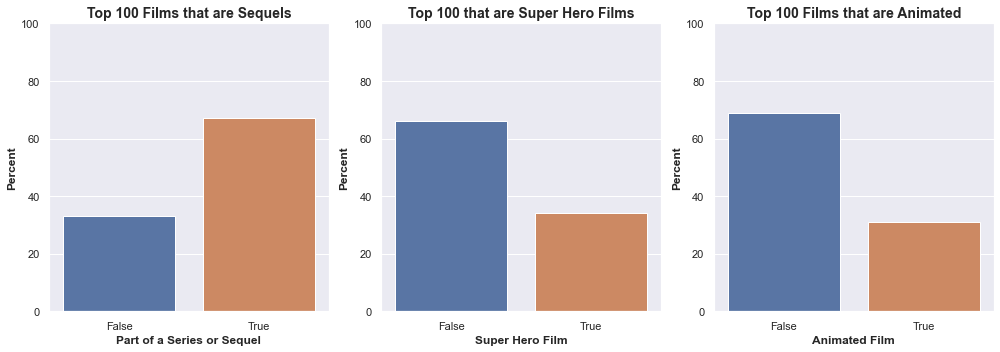

In [366]:
fig, axes = plt.subplots(figsize=(14, 5), ncols=3)

#Series/Sequel Distribution
sns.countplot(data=top_100_df, x='series_or_sequel', ax=axes[0])
axes[0].set_xlabel('Part of a Series or Sequel', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Percent', fontsize=12, fontweight='bold')
axes[0].set_title( 'Top 100 Films that are Sequels', fontsize=14, fontweight='bold')
axes[0].set_ylim(0,100)


#Superhero Distribution
sns.countplot(data=top_100_df, x='super_hero_film', ax=axes[1])
axes[1].set_xlabel('Super Hero Film', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percent', fontsize=12, fontweight='bold')
axes[1].set_title( 'Top 100 that are Super Hero Films', fontsize=14, fontweight='bold')
axes[1].set_ylim(0,100)

#Animation Distribution
sns.countplot(data=top_100_df, x='animation', ax=axes[2])
axes[2].set_xlabel('Animated Film', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Percent', fontsize=12, fontweight='bold')
axes[2].set_title( 'Top 100 Films that are Animated', fontsize=14, fontweight='bold')
axes[2].set_ylim(0,100)

fig.tight_layout();



# Objective 5: What is the average budget of top movies?

In [322]:
#Uploads data about movie budgets
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [323]:
#Uses money cleaner function to clean data for statistical analysis
budget_clean = money_cleaner(df, 'production_budget', 'budget_clean')
df['budget_clean'] = budget_clean

worldwide_gross = money_cleaner(df, 'worldwide_gross', 'ww_gross_clean')
df['ww_gross_clean'] = worldwide_gross
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747


In [324]:
df['production_profit'] = df.ww_gross_clean - df.budget_clean


In [325]:
df.sort_values(by='production_profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",200000000,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864
...,...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,"$105,000,000","$6,712,451","$10,364,769",105000000,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",110000000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,150000000,0,-150000000


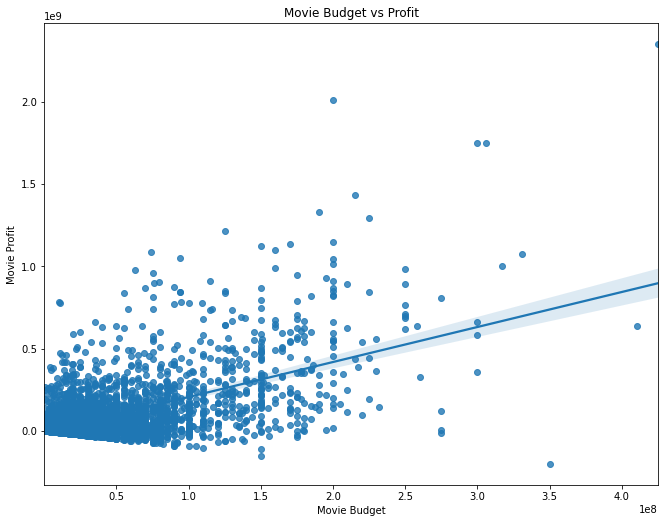

In [284]:
#Creates visual to see if there is a correlation between budget and profit. 
# Will movies with higher budgets have higher profits as well?

budget = df['budget_clean']
profit = df['production_profit']


ax = sns.regplot(x=budget, y=profit)


ax.get_figure().set_size_inches((11, 8.5))
ax.set_xlabel('Movie Budget')
ax.set_ylabel('Movie Profit')
#ax1.xaxis.set_major_formatter("{x:,.2f}")
#ax2.yaxis.set_minor_formatter("{y:,.2f}")
ax.set_title("Movie Budget vs Profit");